# Given

A dataset of a good coffee roast attributes (temperature, duration)

| x1 - Temperature (C)     | x2 - Duration (min) | y - Quality (1-good, 0-bad) |
| ----------------| ------------------------ | ------------------------ |
| 185.31    | 12.69 | 0 |
| 259.92    | 11.86 | 1 |
| ...    | ... | ... |

# Find

Using TensorFlow model predict taste of coffee based on these Temp and Duration:

| x1 - Temperature     | x2 - Duration | y - Quality |
| ----------------| ------------------------ | ------------------------ |
| 200    | 13.9 | ? |
| 200    | 17 | ? |

TensorFlow model parameters:
   - Activation = sigmoid
   - Optimizator = Adam(learning_rate = 0.01)
   - Loss = BinaryCrossentropy
   - 2 sigmoid layers [x3->x1]
   - Epochs = 10
   - Forward and back propagation (theory is discussed later)

# Solution

In [73]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Plot input data

Text(0.5, 0, 'Celsius')

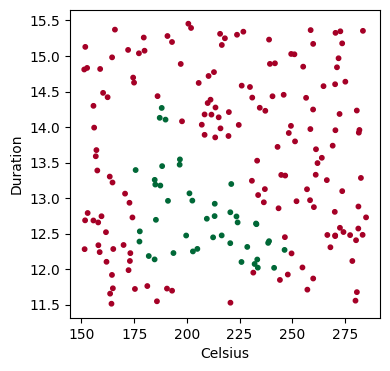

In [74]:
inputs = np.load("coffee_roast.npz")

x = inputs["train_x"]
y = inputs["train_y"]

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x[:,0], x[:,1], c=y, cmap="RdYlGn", s=10)
ax.set_ylabel("Duration")
ax.set_xlabel("Celsius")

### TensorFlow model

   <center> <img  src="images/C2_W1_RoastingNetwork.PNG" width="200" />   <center/>  

In [75]:
coffee_model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_dim=2, units=3, activation="sigmoid", name="L1"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="L_out")
])

coffee_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     loss=tf.keras.losses.BinaryCrossentropy(),
                     )

coffee_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 3)                 9         
                                                                 
 L_out (Dense)               (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Explaining the values above:

* L1 has 3 units, each has 2w and b, i.e. 9 in total
* L2 has 1 unit, so 3w and a b, i.e. 4
* Total = 9 + 4 = 13

w1 (2,3) -> w2 (3,1)

Scale features

In [76]:
norm_layer = tf.keras.layers.Normalization(axis=-1)
norm_layer.adapt(x)
x_scaled = norm_layer(x)

Fit 10 Epochs

In [77]:
xT = np.tile(x_scaled, (1000,1))
yT = np.tile(y,(1000,1))

In [78]:
coffee_model.fit(xT, yT, epochs=10, )

Epoch 1/10
6250/6250 [==============================] - 16s 2ms/step - loss: 0.1950
Epoch 2/10
6250/6250 [==============================] - 17s 3ms/step - loss: 0.1211
Epoch 3/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.0840
Epoch 4/10
6250/6250 [==============================] - 16s 2ms/step - loss: 0.0217
Epoch 5/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0132
Epoch 6/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0093
Epoch 7/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0068
Epoch 8/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0049
Epoch 9/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0036
Epoch 10/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.0027


* The default size of a batch in Tensorflow is 32
* We copied x (200,2) 1000 times, so the size of input array is 200'000 rows

200'000 / 32 = 6250

Resulted weights

In [79]:
w1, b1 = coffee_model.get_layer("L1").get_weights()
w2, b2 = coffee_model.get_layer("L_out").get_weights()


for i in range(w1.shape[1]):
    print(f"Layer 1 neuron {i+1} has weights {w1[:,i]}, and bias {b1[i]}")

print(f"layer 2 single neuron weights are {w2.reshape(-1,)}, and bias = {b2}")

Layer 1 neuron 1 has weights [ 0.01183133 -8.97577   ], and bias -11.230416297912598
Layer 1 neuron 2 has weights [14.514082 12.117789], and bias 1.7996609210968018
Layer 1 neuron 3 has weights [12.568029   0.3214585], and bias 13.182164192199707
layer 2 single neuron weights are [-44.372135 -42.057995  37.806725], and bias = [-12.238274]


# Prediction

In [80]:
x_predict = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example

prediction = coffee_model.predict(norm_layer(x_predict)) >= 0.5

print(np.c_[prediction,np.array([[1],[0]])])

1/1 [==============================] - 0s 141ms/step
[[1 1]
 [0 0]]


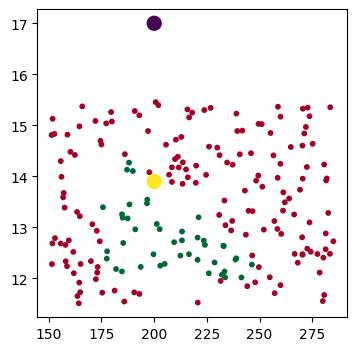

In [81]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x[:,0], x[:,1], c=y, cmap="RdYlGn", s=10)
ax.scatter(x_predict[:,0], x_predict[:,1], c=prediction, s=100)